In [36]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [37]:
dataset_path = "D:/GitHub/Datasets/MassachusettsRoads"
images_path = os.path.join(dataset_path, "Images")
masks_path = os.path.join(dataset_path, "Masks")
images_crops_path = os.path.join(dataset_path, "Images_Crops")
masks_crops_path = os.path.join(dataset_path, "Masks_Crops")

if not os.path.exists(images_crops_path):
	os.mkdir(images_crops_path)
if not os.path.exists(masks_crops_path):
	os.mkdir(masks_crops_path)

def listdir_fullpath(path):
    return [os.path.join(path, file) for file in os.listdir(path)]

images = listdir_fullpath(path = images_path)
masks = listdir_fullpath(path = masks_path)

In [38]:
for size in np.arange(1, 6):
    
    rows = size
    cols = size

    for id in np.arange(0, len(images)):

        image = cv2.imread(images[id])
        mask = cv2.imread(masks[id])

        rows_ = np.round(image.shape[0]/rows)
        rows_indices = [0]

        for i in np.arange(0, rows):

            if i < rows - 1:
                rows_indices.append(int((i + 1) * rows_))
            else:
                rows_indices.append(int(image.shape[0]))

        cols_ = np.round(image.shape[1]/cols)
        cols_indices = [0]

        for i in np.arange(0, cols):

            if i < cols - 1:
                cols_indices.append(int((i + 1) * cols_))
            else:
                cols_indices.append(int(image.shape[1]))

        image_filename = os.path.basename(images[id])
        print(id, rows_indices, cols_indices)

        for i in np.arange(len(rows_indices) - 1):

            i_start = rows_indices[i]
            i_end = rows_indices[i + 1]

            for j in np.arange(len(cols_indices) - 1):

                j_start = cols_indices[j]
                j_end = cols_indices[j + 1]

                image_ = image[i_start:i_end, j_start:j_end, :]
                mask_ = mask[i_start:i_end, j_start:j_end, :]

                new_filename = image_filename[:-4] + "_" + str(rows * cols) + "_" + str(i + 1) + "_" + str(j + 1) + ".png"
                image_save_path = os.path.join(images_crops_path, new_filename)
                mask_save_path = os.path.join(masks_crops_path, new_filename)

                cv2.imwrite(image_save_path, image_)
                cv2.imwrite(mask_save_path, mask_)

        print("Save crop for image:", images[id])

0 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10078660_15.png
1 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10078675_15.png
2 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10078690_15.png
3 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10078705_15.png
4 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10078720_15.png
5 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10078735_15.png
6 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10078750_15.png
7 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10228660_15.png
8 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/MassachusettsRoads\Images\10228675_15.png
9 [0, 1500] [0, 1500]
Save crop for image: D:/GitHub/Datasets/Ma

In [40]:
images_crops_ = os.listdir(images_crops_path) 
masks_crops_ = os.listdir(masks_crops_path)

if images_crops_ == masks_crops_:
    print('Lists are exactly')
else:
    print('Lists are not equal')

Lists are exactly


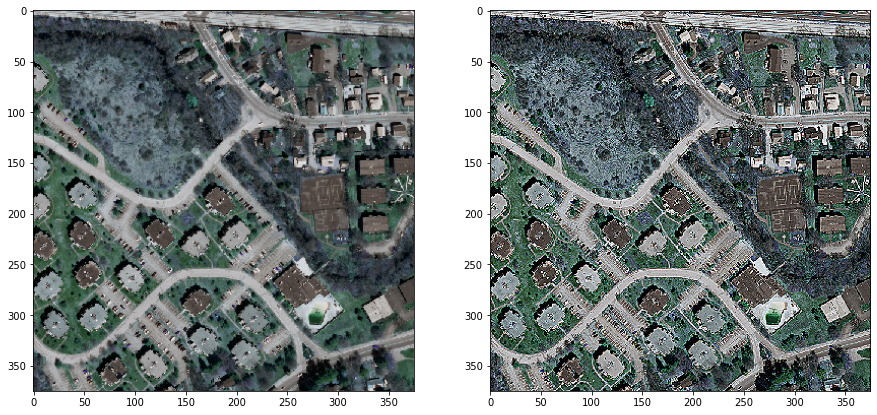

In [100]:
id = 50384
img_path = os.path.join(os.path.join(dataset_path, "Images_Crops"), os.listdir(os.path.join(dataset_path, "Images_Crops"))[id])
img = cv2.imread(img_path)
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_2 = cv2.filter2D(img, -1, kernel_sharp)

fig = plt.figure(figsize = (15, 15))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_2)